# COMP 7810 Group project-- Group 6
### LI Wenshu (20440510), XU Shiqian (20442882), LIU Yangyang (20455356)

## Part one: dataset and goals

### Our group project is focus on some sales data from Tmall flagship store in year 2014-2017
### dataset is collected from：https://www.datafocus.ai/

### dataset details:
#### Source: this dataset is about sales and data source is from www.datafocus.ai and it's a real world dataset.
#### Field: belongs to the sales.
#### Attributes: Among all attributes we must choose the representative ones and do analysis on them.

### Goals and Tasks:
### Goals:
### To find attributes are effecting the sales or not and how much degree.
Categories of factors that can affect sales price:（all 13 attributes)
first in timeline(订单日期） analyze the whole sales situation. 订单日期 also can be analyzed in 3 aspects.
1.region:区域，目的省份，目的城市，快递公司
2.customer：顾客姓名,收款方式,区域
3.goods：产品名称，产品类别，产品子类别
销售数量，销售金额
### Conduct statistical analysis on the dataset and build models, then based on results do evulations and summary.
    
### Tasks:
#### 1.Import dataset
#### 2.Analyze on dataset
#### 3.Data preprocessing
#### 4.Exploratory Data Analysis
#### 5.Feature engineering
#### 6.Experiments and results
#### 7.Evulation
#### 8.Summary

## Part two: import data and python packages

In [1]:
# import related library to futher study
import numpy as np
import pandas as pd
#import matplotlib to do some visual display
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats
import seaborn as sns

#### we use the encoding='gbk' to load the original dataset into dataframe

In [3]:
#Read the data file in csv format into Dataframe, load the dataset
data = pd.read_csv('天猫旗舰店销售数据 .csv', encoding='gbk')
#preview the data
print("dataset preview:")
data

dataset preview:


,订单日期,产品名称,顾客姓名,订单单号,区域,目的省份,目的城市,快递公司,产品类别,产品子类别,销售数量,销售金额,收款方式
0,2017/3/2,肉松青豆120g,Lena Cacioppo,10021247876,华东,安徽省,蚌埠市,圆通,坚果炒货,特惠炒货,29,188.094,应收账款
1,2017/5/19,小米锅巴（麻辣味）90g,Alejandro Ballentine,10021247909,华南,广东省,佛山市,圆通,坚果炒货,特惠炒货,46,227.700,应收票据
2,2017/7/16,原生碧根果218g,Fred McMath,10021247974,华南,河南省,三门峡市,圆通,坚果炒货,果果仁仁,35,668.640,应收票据
3,2017/7/24,野山小核桃仁160g,Evan Minnotte,10021248082,华北,山西省,晋城市,圆通,坚果炒货,果果仁仁,48,2596.608,应收账款
4,2016/2/12,精装纸皮核桃380g,Olvera Toch,10021248111,华北,北京市,北京市,中通,坚果炒货,磕壳坚果,1,38.703,应收账款
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,2014/4/24,小米锅巴孜然味90g,Alejandro Ballentine,10022252218,华北,内蒙古,乌兰察布市,顺丰,坚果炒货,特惠炒货,48,232.800,应收账款
8690,2014/1/18,甘草西瓜子218g,Neil Knudson,10022252219,华东,安徽省,池州市,顺丰,坚果炒货,磕壳坚果,45,574.695,应收账款
8691,2015/5/26,良品山核桃椒盐味238g,Alejandro Grove,10022252220,华北,河北省,廊坊市,顺丰,坚果炒货,磕壳坚果,42,1118.502,应收账款
8692,2015/11/12,小米锅巴孜然味90g,Deborah Brumfield,10022252221,华北,北京市,北京市,顺丰,坚果炒货,特惠炒货,46,211.600,应收账款


## Part three: data check, value assessment, data preprocessing

In [4]:
#first look at the data shape(size)
data.shape

(8694, 13)

In [5]:
#look at the data type of each column
data.dtypes

订单日期      object
产品名称      object
顾客姓名      object
订单单号       int64
区域        object
目的省份      object
目的城市      object
快递公司      object
产品类别      object
产品子类别     object
销售数量       int64
销售金额     float64
收款方式      object
dtype: object

#### we can easily see our 13 attributes are mostly object and only sales attribute are numerical ones.

In [6]:
# check if any missing value in the dataframe
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单日期    8694 non-null   object 
 1   产品名称    8694 non-null   object 
 2   顾客姓名    8694 non-null   object 
 3   订单单号    8694 non-null   int64  
 4   区域      8694 non-null   object 
 5   目的省份    8694 non-null   object 
 6   目的城市    8694 non-null   object 
 7   快递公司    8694 non-null   object 
 8   产品类别    8694 non-null   object 
 9   产品子类别   8694 non-null   object 
 10  销售数量    8694 non-null   int64  
 11  销售金额    8694 non-null   float64
 12  收款方式    8694 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 883.1+ KB


#### so this dataset does not have any missing value so we do not need to handle.

In [8]:
#Basic descriptive information of the data and check outliers.
data.describe()

,订单单号,销售数量,销售金额
count,8.694000e+03,8694.000000,8694.000000
mean,1.002184e+10,27.687716,462.819765
std,4.241441e+05,14.775256,489.481543
min,1.002125e+10,1.000000,2.325000
25%,1.002141e+10,15.000000,139.207500
50%,1.002202e+10,28.000000,282.900000
75%,1.002225e+10,40.000000,592.515000
max,1.002225e+10,55.000000,3079.944000


#### Basic statistical description information, see basically no outliers.

In [9]:
# check if exist duplicated value
data.duplicated().sum()> 0

True

#### This dataset have no missing, duplicated and outliers so we do not need to do any processing on it.

## Part Four: Exploratory Data Analysis

In [10]:
#Data format conversion
#Since "订单日期" will be used in further analysis later, but we see "订单日期" now is "object" format so we have 
#to do data cleanning on it and transform its format.

In [11]:
#for "订单日期" attribute so format conversion
data.loc[:,'订单日期']=pd.to_datetime(data.loc[:,'订单日期'],format='%Y/%m/%d',errors='ignore')

In [12]:
# Sort, sort data in ascending order by “订单日期"
#Sort data_new by "订单日期"
data_new=data.sort_values(by='订单日期',ascending=True,na_position='first')

In [13]:
# Intercept the year and month fields
from datetime import datetime
dt=data_new['订单日期'].astype(str)
dt=dt.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
data_new['month']=dt.map(lambda x:x.month)
data_new['year']=dt.map(lambda x:x.year)
data_new['day']=dt.map(lambda x:x.day)

In [14]:
# add "销售单价“ attribute
data_new['销售单价']=data_new['销售金额']/data_new['销售数量']

In [15]:
# now we can build a sales_data datset with some certain attributes
sales_data=data_new[['订单日期','销售数量','销售金额','销售单价','year','month','day']]
sales_data.head()

,订单日期,销售数量,销售金额,销售单价,year,month,day
4920,2014-01-01,37,164.983,4.459,2014,1,1
6022,2014-01-01,23,110.400,4.800,2014,1,1
7407,2014-01-02,9,152.100,16.900,2014,1,2
7964,2014-01-02,6,222.642,37.107,2014,1,2
7325,2014-01-02,13,96.525,7.425,2014,1,2


<AxesSubplot:title={'center':'The distribution of price'}, ylabel='Frequency'>

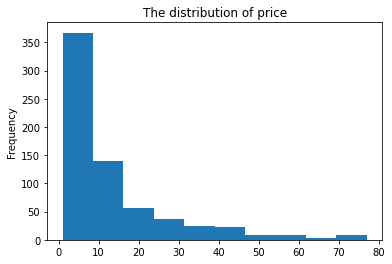

In [16]:
# now gain some graphical insight
# Visualizing the distribution of the variables
# plot some variable  
data_new['销售单价'].value_counts().plot(kind='hist', 
                              title='The distribution of price',
                              figsize=(6, 4))

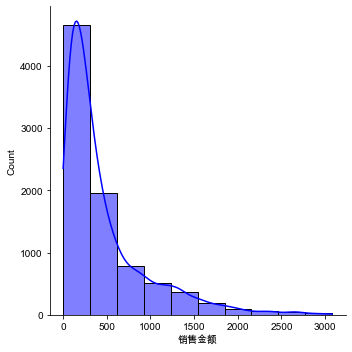

In [69]:
#the distrbution of sales
sns.displot(data_new['销售金额'], color="b",bins=10, kde=True)

In [18]:
stats.kstest(data_new['销售金额'], 'norm')

KstestResult(statistic=0.9997666842128863, pvalue=0.0)

In [19]:
# since our dataset attribute's valua are Chinese and we need to do something to successfully let matplotlib work
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

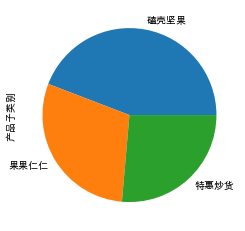

In [21]:
# since 产品类别 are all 坚果炒货
data_new['产品子类别'].value_counts().plot(kind='pie')
plt.show()

array([[<AxesSubplot:title={'center':'(2014, 东北)'}>,
        <AxesSubplot:title={'center':'(2014, 华东)'}>,
        <AxesSubplot:title={'center':'(2014, 华北)'}>,
        <AxesSubplot:title={'center':'(2014, 华南)'}>,
        <AxesSubplot:title={'center':'(2014, 西北)'}>],
       [<AxesSubplot:title={'center':'(2014, 西南)'}>,
        <AxesSubplot:title={'center':'(2015, 东北)'}>,
        <AxesSubplot:title={'center':'(2015, 华东)'}>,
        <AxesSubplot:title={'center':'(2015, 华北)'}>,
        <AxesSubplot:title={'center':'(2015, 华南)'}>],
       [<AxesSubplot:title={'center':'(2015, 西北)'}>,
        <AxesSubplot:title={'center':'(2015, 西南)'}>,
        <AxesSubplot:title={'center':'(2016, 东北)'}>,
        <AxesSubplot:title={'center':'(2016, 华东)'}>,
        <AxesSubplot:title={'center':'(2016, 华北)'}>],
       [<AxesSubplot:title={'center':'(2016, 华南)'}>,
        <AxesSubplot:title={'center':'(2016, 西北)'}>,
        <AxesSubplot:title={'center':'(2016, 西南)'}>,
        <AxesSubplot:title={'center':'(2017

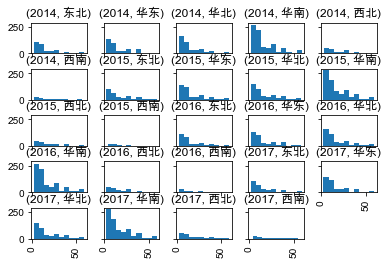

In [22]:
# now for time, we gain some insights
# Plot the 销售单价 distribution of different groups year and 区域)
data_new.hist(column='销售单价', by=['year','区域'], sharex=True, sharey=True, bins=10)

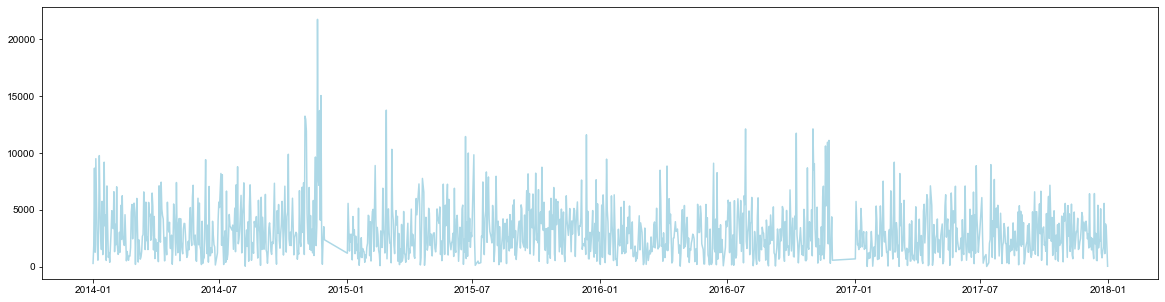

In [23]:
data_new_average_sales_year = data_new.groupby(by=['订单日期'], as_index=False)['销售金额'].sum()
data_new_average_sales = data_new_average_sales_year.sort_values('销售金额', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(data_new_average_sales_year.订单日期, data_new_average_sales_year.销售金额,color = 'lightblue')
plt.show()

#### after some insights about certain attributes now we do data analysis on 
#### three dimensions: customer,region,goods

#### 1.whole sales situations

In [24]:
# 1.1 analyze this 4 year 销售金额，销售数量，销售单价

<AxesSubplot:xlabel='year'>

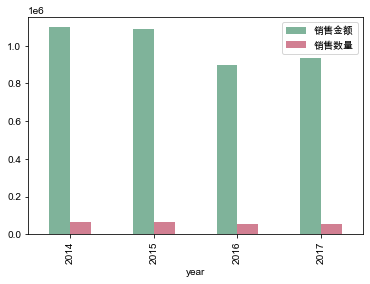

In [25]:
data_sale=data_new.groupby('year').sum()[['销售金额','销售数量']]
data_sale

#可视化展现
data_sale.plot(kind='bar',colormap = 'RdYlGn_r',alpha=0.5)

In [26]:
#Through the above calculation results and the chart display, we can find that the annual performance 
# of the supermarket from 2014 to 2017 shows an unstable trend, and the sales, sales volume are all floating. 
# The sales volume has above 800,000 from 2014 to 2017, indicating Operations are gradually stabilizing. 
# However, there is still a certain gap in sales compared to large supermarkets so they can continue to work hard.

In [27]:
# caculate Year-on-year growth rate
rate=data_sale.pct_change()
rate

,销售金额,销售数量
year,,
2014,NaN,NaN
2015,-0.009445,-0.047702
2016,-0.172273,-0.131714
2017,0.039592,-0.011925


In [28]:
# from the above result, we easily see that sales amount and number are all decreasing.
# maybe the nut lover decrease or users prefer other platforms to buy nuts.
# so In addition, combined with annual sales, sales and other indicators, combined with the
# company's overall strategic planning, it is possible to predict or formulate the next year's total sales
#performance indicators.

In [29]:
#### 1.2 every year,month sales situations

<AxesSubplot:title={'center':'销售数量'}, xlabel='month'>

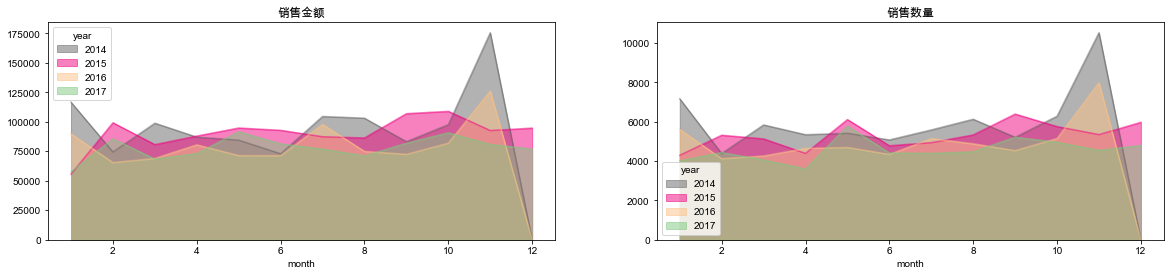

In [30]:
# every month 销售额/销量
data_sale_month=pd.pivot_table(data_new,index='month',columns='year',values=['销售数量','销售金额',],aggfunc='sum')
data_sale_month

#每月销售额/销量堆叠图
fig,axes = plt.subplots(1,2,figsize = (20,4))
data_sale_month['销售金额'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[0],title='销售金额')
data_sale_month['销售数量'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[1],title='销售数量')

In [31]:
#From the above table and chart, it can be roughly seen that the supermarket's sales seasonality is still different.
#The end of the year and the beginning of the year are the peak season for nuts.

#For peak season months, strategies such as operation promotion should be maintained, 
# and investment can be increased to increase overall sales.
# For the off-season months, new product development can be combined with product characteristics, 
# and some promotional activities can be held to attract customers.

In [32]:
# caculate growth rate
data_sale_month['销售金额'].pct_change(axis='columns').style.background_gradient(cmap='Greens',axis =1,low=0,high=1)

year,2014,2015,2016,2017
month,,,,
1,nan,-0.523504,0.615572,-0.357441
2,nan,0.333380,-0.340761,0.308517
3,nan,-0.183486,-0.145452,-0.007522
4,nan,0.010385,-0.084685,-0.091534
5,nan,0.122263,-0.247225,0.283240
6,nan,0.273061,-0.231917,0.141584
7,nan,-0.164309,0.119666,-0.214007
8,nan,-0.162433,-0.132059,-0.050939
9,nan,0.285662,-0.322765,0.130522


see from the table, the rate sometimes decrease and sometimes increase so
the nut sales condition really unstable.

#### 2.region sales situations

In [33]:
# in this analysis, 区域，目的省份，目的城市 ，快递公司 four attributes were chosen.

In [34]:
# 2.1 only foucus on "区域“
data_new["区域"].value_counts()
# we can see the whole China region has been splited into 6 regions.

华南    3210
华北    1716
华东    1584
东北    1208
西北     680
西南     296
Name: 区域, dtype: int64

<AxesSubplot:title={'center':'Mean 销售金额 in each 区域'}, ylabel='区域'>

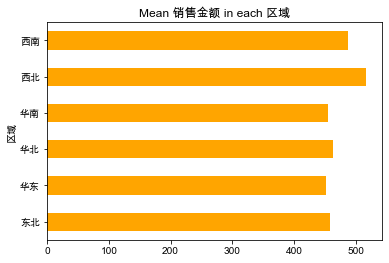

In [35]:
# plot the average of 销售金额 of each region

data_new.groupby('区域')['销售金额'].mean().plot(kind='barh', 
                                        title='Mean 销售金额 in each 区域', 
                                        color='orange',
                                        figsize=(6, 4)) 

In [36]:
# we see that different regions, price are really close to each other. 

In [37]:
# 2.2 more details about region analysis

In [38]:
print(data_new["目的城市"].value_counts())

北京市     336
广州市     300
北海市     300
天津市     298
台州市     210
       ... 
攀枝花市      2
遂宁市       2
临沧市       2
玉溪市       2
巴中市       2
Name: 目的城市, Length: 247, dtype: int64


In [39]:
data_new["目的省份"].value_counts()

广东省    1324
广西省     794
浙江省     662
辽宁省     582
内蒙古     488
海南省     398
山西省     392
吉林省     358
甘肃省     350
北京市     336
河南省     328
安徽省     322
天津市     298
黑龙江     268
河北省     202
湖北省     200
山东省     178
湖南省     166
陕西省     140
福建省     116
上海市     114
江苏省     112
四川省     106
宁夏       98
江西省      80
新疆       72
贵州省      72
重庆市      68
西藏       30
云南省      20
青海省      20
Name: 目的省份, dtype: int64

In [40]:
# we can easily see that “目的省份“，”目的城市“ have too many values
# so we will analyze it with another dimension "产品子类别“
# first use hot-encoding to transform the "产品子类别" to "numerical" values
#bulid 产品子类别 group
def good(x):
    if x =='特惠炒货':
        return 0
    elif x=="果果仁仁":
        return 1
    else:
        return 2
data_new['产品子类别'] = data_new['产品子类别'].apply(good)

In [41]:
data_new["产品子类别"]

4920    2
6022    2
7407    2
7964    2
7325    2
       ..
3341    2
2593    1
138     0
1002    1
2785    2
Name: 产品子类别, Length: 8694, dtype: int64

array([[<AxesSubplot:title={'center':'上海市'}>,
        <AxesSubplot:title={'center':'云南省'}>,
        <AxesSubplot:title={'center':'内蒙古'}>,
        <AxesSubplot:title={'center':'北京市'}>,
        <AxesSubplot:title={'center':'吉林省'}>,
        <AxesSubplot:title={'center':'四川省'}>],
       [<AxesSubplot:title={'center':'天津市'}>,
        <AxesSubplot:title={'center':'宁夏'}>,
        <AxesSubplot:title={'center':'安徽省'}>,
        <AxesSubplot:title={'center':'山东省'}>,
        <AxesSubplot:title={'center':'山西省'}>,
        <AxesSubplot:title={'center':'广东省'}>],
       [<AxesSubplot:title={'center':'广西省'}>,
        <AxesSubplot:title={'center':'新疆'}>,
        <AxesSubplot:title={'center':'江苏省'}>,
        <AxesSubplot:title={'center':'江西省'}>,
        <AxesSubplot:title={'center':'河北省'}>,
        <AxesSubplot:title={'center':'河南省'}>],
       [<AxesSubplot:title={'center':'浙江省'}>,
        <AxesSubplot:title={'center':'海南省'}>,
        <AxesSubplot:title={'center':'湖北省'}>,
        <AxesSubplot:title={'cent

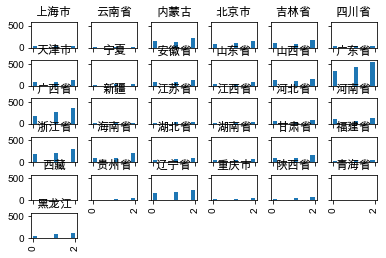

In [42]:
# Plot the 产品子类别 distribution of different 目的省份
data_new.hist(column='产品子类别', by=['目的省份'], sharex=True, sharey=True, bins=10)

In [43]:
# as for 目的城市， its value is too much and if we group it into small groups 
# then we will get 目的省份 or even 区域 value, that's duplicated tasks

In [44]:
# as for 快递公司， we combine it with 区域  to tell 快递公司's prefrence in different region

Hypothesis Testing 1

Null Hypothesis: There is no relationship between 快递公司 preference and the region of the customer.

Alternate Hypothesis: There is a relationship between 快递公司 preference and the of region of the customer

significance level, α to be 0.05.

In [45]:
# data count: express and region
observed = data_new.pivot_table('订单单号', ['区域'], '快递公司', aggfunc='count').reset_index()
observed = observed.set_index('区域')
observed

快递公司,EMS,中通,圆通,申通,韵达,顺丰
区域,,,,,,
东北,24,118,292,114,114,546
华东,20,120,424,214,124,682
华北,42,136,434,232,156,716
华南,38,236,924,368,272,1372
西北,24,46,178,90,70,272
西南,10,22,66,24,26,148


we can easily see that among all the express companies, "顺丰" is the most popular no matter in what region

In [46]:
# Implement hypothesis verification and calculate p value
chi1, p1, dof, expected = stats.chi2_contingency(observed)
print(chi1)
print(p1)

77.93869128094447
2.392214649787065e-07


Conclusion: We get a p1 value that is less than the confidence level that we specified before,
so we can reject the null hypothesis, and the conclusion is that there is a relationship
between express preference and the region of customer.

In [47]:
#### 2.region sales situations

In [48]:
# as for customer aspect,顾客姓名,收款方式,区域 are related.

In [49]:
# first we see how many different customers buy nuts through Tianmao these years
data_new["顾客姓名"].value_counts()

Carlos Soltero       46
Adam Hart            46
Brad Thomas          44
Mark Cousins         42
Eric Barreto         40
                     ..
Brooke Gillingham     2
Tony Chapman          2
Anthony Witt          2
Joy Daniels           2
Aimee Bixby           2
Name: 顾客姓名, Length: 764, dtype: int64

we have 764 customers in total and the least buy time is 2 and the most buy time is 46.

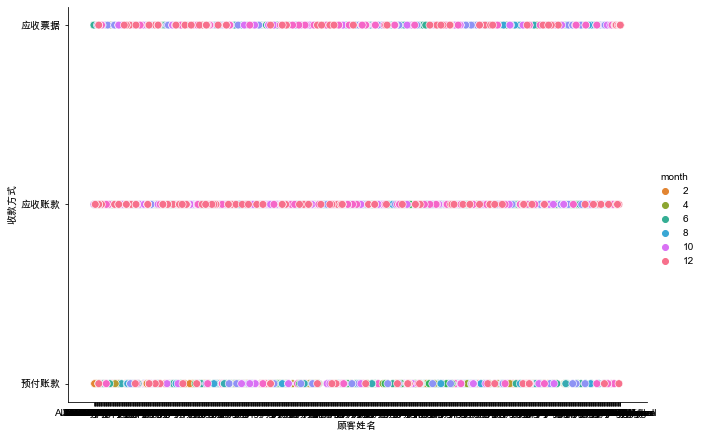

In [64]:
# we analyze different customer will chose which payment method
sns.relplot(x="顾客姓名", y="收款方式", data=data_new,
            kind='scatter', 
            hue='month', 
            palette='husl',s=60, # 设置调色盘类型和散点大小
            aspect=1.5,height=6  # 设置图像大小和横纵比
           )

to be honest, the last plot x label contains too many customers so the Rendering effect
may not well, but we still can see same customer often use the same payment

In [ ]:
# with too many customers, we cannot analyze them together, so we chose 